In [ ]:
import diffractio
from diffractio import sp, nm, plt, mm, degrees, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw_several_fields
from numpy import *

%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize']=[4,4]
matplotlib.rcParams['figure.dpi']=125

number of processors: 8
total memory        : 15.6 Gb
available memory    : 16 %
max frequency       : 2995 GHz


In [5]:
lmbda=0.808*um
k=2*np.pi/
size=1*mm #size of the canvas

x=np.linspace(-1*size, size, 1024*3)
y=np.linspace(-1*size, size, 1024*3)

In [6]:
#Plane wave source => u0
u0 = Scalar_source_XY(x, y, wavelength=wavelength, info='u0')
u0.plane_wave(phi=0 * degrees, theta=0 * degrees)

100.0
9


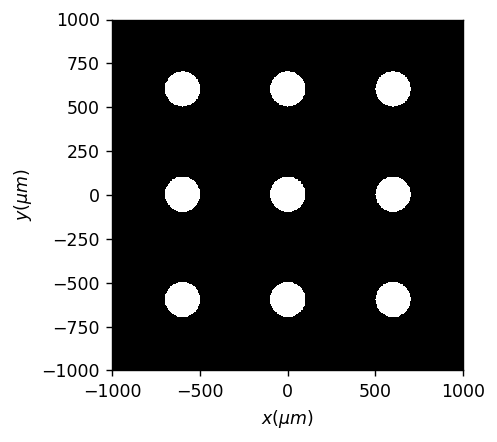

In [7]:
#Array generator plane
a = 100*um #radius of the bright traps
print(a)

sq1=Scalar_mask_XY(x, y, wavelength)
sq1.square(
    r0=(0* um, 0 * um),
    size=(2000 * um, 2000 * um),
    angle=0 * degrees)

#sq2=Scalar_mask_XY(x, y, wavelength)
#sq2.square(
#    r0=(0* um, 0 * um),
#    size=(1800 * um, 1800 * um),
#    angle=0 * degrees)

#sq=sq1-sq2
#sq.draw(kind='intensity', filename='brightArray_mask.png')

s = Scalar_mask_XY(x, y, wavelength)
s.circle(
    r0=(0 * um, 0 * um), radius=(a, a), angle=0 * degrees)

t0= Scalar_mask_XY(x, y, wavelength)

num_points = t0.insert_array_masks(
    t1=s,
    space=[600 * um, 600 * um],
    margin=400 * um,
    angle=0 * degrees)

t0.draw(kind='intensity', filename='brightArray_mask.png')
print(num_points)

In [8]:
#Field propagating through array gen => u1
u1=s*u0
#u1.cut_resample(
#    x_limits=(-1000 * um, 1000 * um),
#    y_limits=(-1000 * um, 1000 * um),
#    num_points=(512, 512),
#    new_field=False)

#u1.draw(kind='intensity', logarithm=False,has_colorbar='vertical');


10000.0


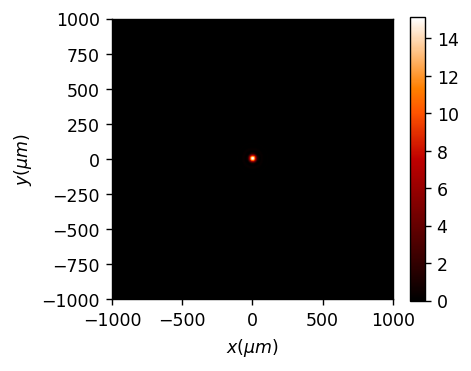

In [9]:
#Field at first lens (f=f1) => u2
f1 = 100*a
print(f1)
u2 = u1.RS(z=f1, new_field=True)

#First lens (f=f1) => t1
t1 = Scalar_mask_XY(x, y, wavelength)
t1.lens(
    r0=(0 * um, 0 * um),
    radius=(-1 * size, 1 * size),
    focal=(f1, f1),
    angle=0 * degrees)


#Field propagating through first lens => u3
u3=t1*u2

#Field in the fourier plane => u4
u4 = u3.RS(z=f1, new_field=True)
#u4.cut_resample(
#    x_limits=(-200 * um, 200 * um),
#    y_limits=(-200 * um, 200 * um),
#    num_points=(512, 512),
#    new_field=False)
u4.draw(kind='intensity', logarithm=False,has_colorbar='vertical');

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1802170e4c0>)

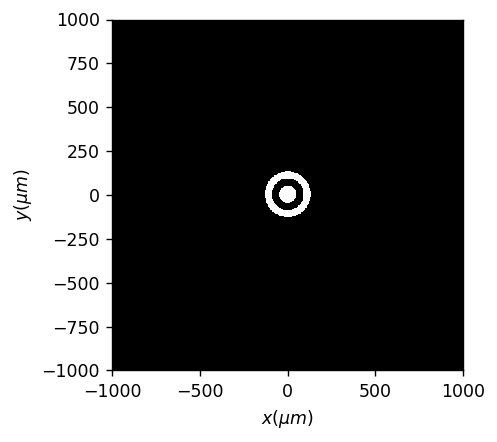

In [12]:
b1 = f1*3.8317/(a*k) #radius of slit in fourier plane
b2= f1*7.0156/(a*k)
b3= f1*10.1735/(a*k)

#Fourier plane filter
c2 = Scalar_mask_XY(x, y, wavelength)
c2.circle(
    r0=(0 * um, 0 * um), radius=(b3, b3), angle=0 * degrees)


r2 = Scalar_mask_XY(x, y, wavelength=wavelength)
r2.ring(
    r0=(0 * um, 0 * um),
    radius1=(b1, b1),
    radius2=(b2, b2),
    angle=0 * degrees)

t2a=c2-r2

t2a.draw()

# t2b = Scalar_mask_XY(x, y, wavelength)
# t2b.circle(
#     r0=(0 * um, 0 * um), radius=(b1, b1), angle=0 * degrees)
# t2b.draw(title='Fourier plane filter - Circle at first 0')


In [13]:
#Field passing through the fourier plane => u5
u5a=t2a*u4
# u5b=t2b*u4

f2=f1/100
#Field at the second lens (f=f2)
u6a = u5a.RS(z=f2, new_field=True)
# u6b = u5b.RS(z=f2, new_field=True)

#Second lens (f=f2) => t3
t3 = Scalar_mask_XY(x, y, wavelength)
t3.lens(
    r0=(0 * um, 0 * um),
    radius=(-1 * size, 1 * size),
    focal=(f2, f2),
    angle=0 * degrees)

#Field propagating through second lens => u7
u7a=t3*u6a
# u7b=t3*u6b

#Field in the image plane =>u8
u8a = u7a.RS(z=f2, new_field=True)
# u8b = u7b.RS(z=f2, new_field=True)

u8a.cut_resample(
    x_limits=(-120 * um, 120 * um),
    y_limits=(-120 * um, 120 * um),
    num_points=(1024, 1024),
    new_field=False)

# u8b.cut_resample(
#     x_limits=(-120 * um, 120 * um),
#     y_limits=(-120 * um, 120 * um),
#     num_points=(1024, 1024),
#     new_field=False)

(array([-15.        , -14.97067449, -14.94134897, ...,  14.94134897,
         14.97067449,  15.        ]),
 array([0.08878976, 0.0653202 , 0.04696286, ..., 0.04696286, 0.0653202 ,
        0.08878976]),
 (-15, 0),
 (15, 0))

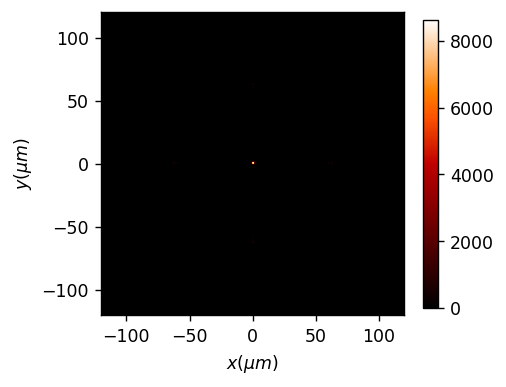

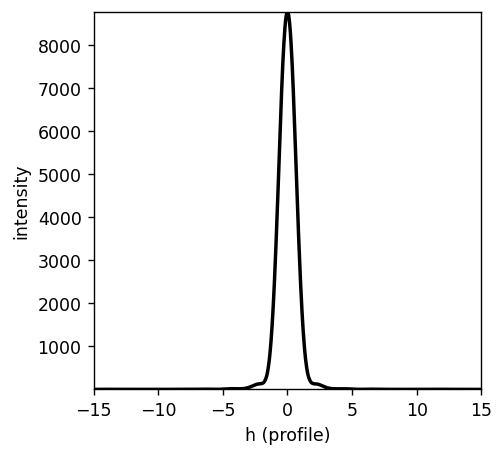

In [14]:
# u8a.normalize()
u8a.draw(kind='intensity', logarithm=False, has_colorbar='vertical')
# u8b.draw(kind='intensity', logarithm=False, has_colorbar='vertical', title='Img Plane (Circle fourier plane)')

u8a.draw_profile(point1=(-15, 0), point2=(15, 0), kind='intensity', order=2)
# u8b.draw_profile(point1=(-15, 0), point2=(15, 0), kind='intensity', order=2)

# h, profile, p1, p2 = t1.profile(
#     point1=(-50, 0), point2=(50, 0), kind='intensity', order=1)
# plt.plot(h, profile, 'r', lw=2);

95.5


(array([-7.45      , -7.44514816, -7.44029632, ...,  7.44029632,
         7.44514816,  7.45      ]),
 array([1.00000000e+00, 9.95603748e-01, 9.91142134e-01, ...,
        3.44412508e-05, 3.50309597e-05, 3.56249065e-05]),
 (0.1, 0),
 (15, 0))

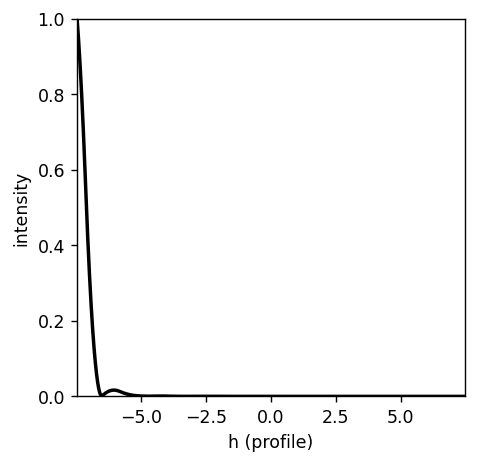

In [74]:
z10= (f2 - 4.5* um) 
print(z10)
u10 = u7a.RS(z=z10, new_field=True)
u10.normalize(kind='intensity')
u10.draw_profile(point1=(0.1, 0), point2=(15, 0), kind='intensity', order=2)